In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import seaborn as sns
sns.set_style('whitegrid')

In [124]:
df = pd.read_csv('hynix_short.csv', parse_dates=[0], dayfirst=False,infer_datetime_format=True, encoding='cp949')

In [37]:
df.head()

,종가,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,환율,유가종가,...,코스피변동,종가코스닥,시가코스닥,고가코스닥,저가코스닥,거래량코스닥,변동코스닥,S.P종가,S.P변동률,삼성등락
date,,,,,,,,,,,,,,,,,,,,,
2010-07-19,23700.0,23700.0,24100,23500,10915618,2.600000e+11,1.400000e+13,590232289,1201.1,76.54,...,-0.37,498.49,494.36,499.63,494.36,506010.0,-0.08,1071.25,0.88,0
2010-07-20,23850.0,23850.0,24050,23550,6009885,1.430000e+11,1.410000e+13,590232289,1215.9,77.44,...,0.28,499.72,501.32,501.64,498.43,686750.0,0.25,1083.48,0.80,1
2010-07-21,23600.0,24250.0,24350,23500,7489851,1.790000e+11,1.390000e+13,590232289,1211.8,76.56,...,0.69,496.73,502.63,503.08,496.73,721150.0,-0.60,1069.59,1.74,1
2010-07-22,22600.0,23850.0,24000,22250,21388196,4.910000e+11,1.330000e+13,590275583,1203.6,79.30,...,-0.76,484.72,496.47,497.84,482.97,668020.0,-2.42,1093.67,-1.40,0
2010-07-23,23250.0,23000.0,23400,22800,12343729,2.860000e+11,1.370000e+13,590275583,1206.9,78.98,...,1.30,483.69,490.17,490.65,480.66,532190.0,-0.21,1102.66,1.80,1


In [125]:
print(df.isna().sum())
print(df.shape)
print(list(df.columns))

date         0
삼성등락         0
등락           0
등락지표         0
등락분류         0
종가           0
대비           0
등락률          0
시가           0
고가           0
저가           0
거래량          0
거래대금         0
시가총액         0
상장주식수        0
환율           0
유가종가         0
유가오픈         0
유가고가         0
유가저가         0
유가변동률        0
한국은행기준금리     0
연준기준금리       0
한미기준금리차이     0
반도체수출금액지수    9
삼성종가         0
SOX종가        0
SOX변동률       0
BTC종가        0
BTC변동률       0
종가코스피        0
고가코스피        0
저가코스피        0
거래량코스피       0
코스피변동        0
종가코스닥        0
시가코스닥        0
고가코스닥        0
저가코스닥        0
거래량코스닥       0
변동코스닥        0
S.P종가        0
S.P변동률       0
dtype: int64
(2670, 43)
['date', '삼성등락', '등락', '등락지표', '등락분류', '종가', '대비', '등락률', '시가', '고가', '저가', '거래량', '거래대금', '시가총액', '상장주식수', '환율', '유가종가', '유가오픈', '유가고가', '유가저가', '유가변동률', '한국은행기준금리', '연준기준금리', '한미기준금리차이', '반도체수출금액지수', '삼성종가', 'SOX종가', 'SOX변동률', 'BTC종가', 'BTC변동률', '종가코스피', '고가코스피', '저가코스피', '거래량코스피', '코스피변동', '종가코스닥', '시가코스닥', '고가코스닥', '저가코스닥', '

In [126]:
df = df.dropna(axis=0)

In [127]:
features = df[['종가','시가', '고가', '저가', '거래량', '거래대금', '시가총액', '상장주식수', '환율', '유가종가', '유가오픈', '유가고가', '유가저가', '유가변동률', '한국은행기준금리', '연준기준금리', '한미기준금리차이', '반도체수출금액지수', '삼성종가', 'SOX종가', 'SOX변동률', 'BTC종가', 'BTC변동률', '종가코스피', '고가코스피', '저가코스피', '거래량코스피', '코스피변동', '종가코스닥', '시가코스닥', '고가코스닥', '저가코스닥', '거래량코스닥', '변동코스닥', 'S.P종가', 'S.P변동률']]
t = df['삼성등락']

features = StandardScaler().fit_transform(features)

In [128]:
random_seed = np.random.seed(2021)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=random_seed)

In [129]:
lda = LinearDiscriminantAnalysis(n_components=1)

In [130]:
x_transform = lda.fit(x_train, y_train).transform(x_train)
y_predict = lda.fit(x_train, y_train).predict(x_test)

from sklearn import metrics
metrics.accuracy_score(y_test, y_predict)

0.8089887640449438

In [111]:
lda.fit(features, t)
tr_lda = lda.transform(features)
tr_lda_component = pd.DataFrame(tr_lda,columns=['lda_component'])
tr_lda_component = pd.concat([tr_lda_component,t], axis=1)

In [112]:
tr_lda_component

,lda_component,삼성등락
0,-0.922664,0
1,-0.062514,1
2,0.930557,1
3,-0.242211,0
4,1.873280,1
...,...,...
2656,0.782948,1
2657,-0.000459,0
2658,-1.736672,0
2659,-0.566999,0


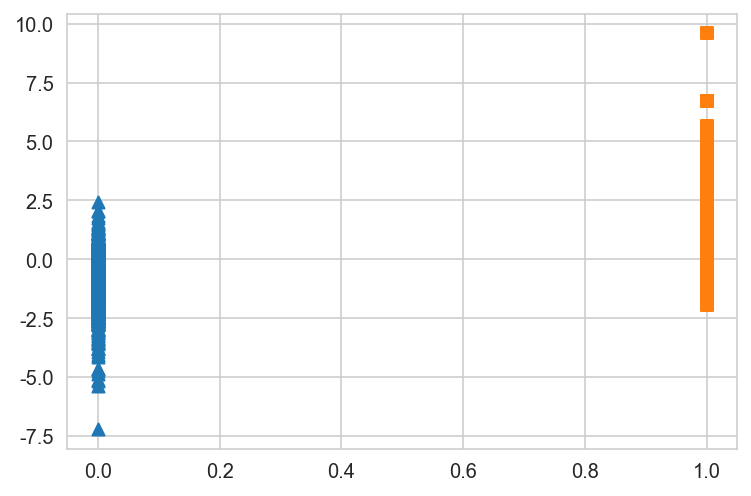

In [123]:
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = tr_lda_component[tr_lda_component['삼성등락']==i]['삼성등락']
    y_axis_data = tr_lda_component[tr_lda_component['삼성등락']==i]['lda_component']

    plt.scatter(x_axis_data, y_axis_data, marker=marker)